# Matplotlib

Here we take a look at some examples of the power of Matplotlib! When we make plots using Pandas, we are calling Matplotlib under the hood. However, we can get much more control over our plots by calling Matplotlib directly. All of the examples in this notebook are taken from Matplotlib's [gallery](https://matplotlib.org/stable/gallery/index.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simple Plot

Here we see a demo of the simplest possible plot with Matplotlib!

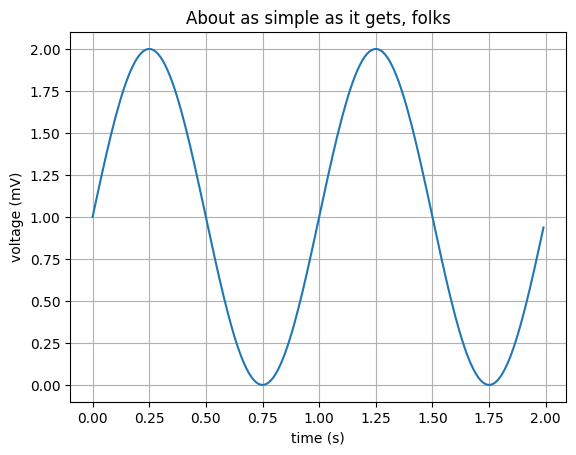

In [2]:
# Simple plot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## Stem Plot

Stem plots are sometimes used to plot discrete signals or measurements while making clear where those measurements intersect the x-axis.

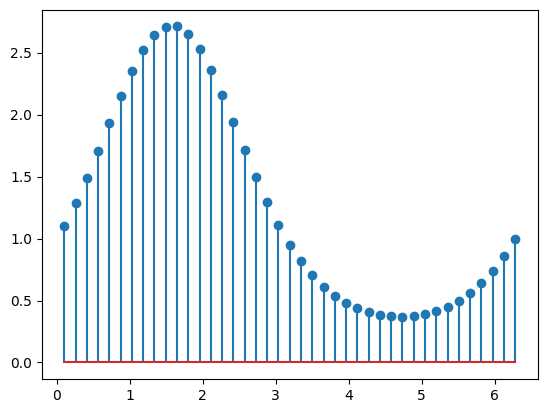

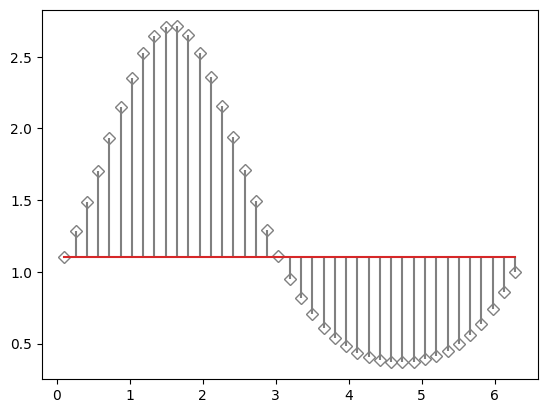

In [3]:
# Stem plot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/stem_plot.html#sphx-glr-gallery-lines-bars-and-markers-stem-plot-py
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)
plt.show()

# Change the color, marker types, and baseline
markerline, stemlines, baseline = plt.stem(
    x, y, linefmt='grey', markerfmt='D', bottom=1.1)
markerline.set_markerfacecolor('none')
plt.show()

## Categorical Data

Matplotlib offers many options for plotting discrete categorical data. We can use Matplotlib to plot this data from a dictionary.

Text(0.5, 0.98, 'Categorical Plotting')

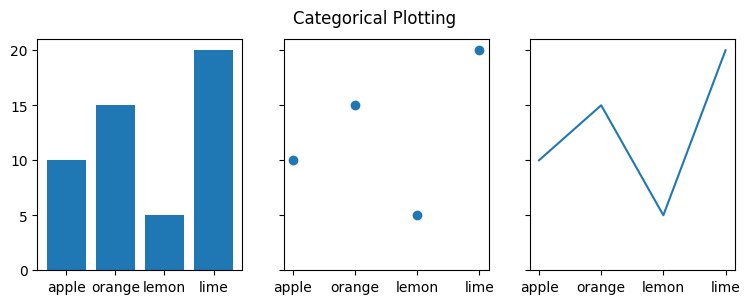

In [4]:
# Categorical data
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

## Bar Charts

We have already seen bar charts through pandas. Here we use Matplotlib directly to show a bar chart.

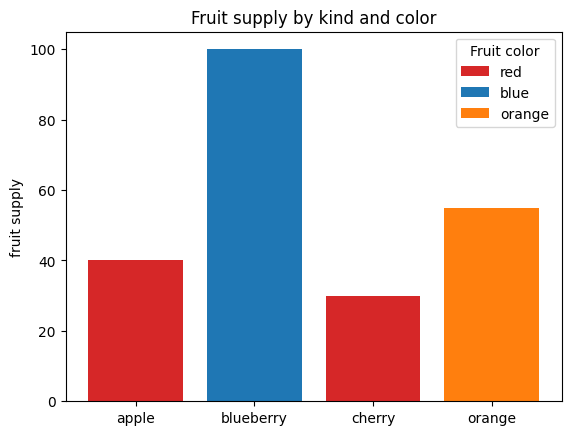

In [5]:
# Bar Charts
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

## Histograms

Matplotlib provides many options for plotting statistical data. A histogram is the most basic. We will see much more advanced examples next class.

(array([2.0000e+00, 2.1000e+01, 5.1000e+01, 2.3500e+02, 7.8100e+02,
        2.1000e+03, 4.5730e+03, 8.3390e+03, 1.2758e+04, 1.6363e+04,
        1.7345e+04, 1.4923e+04, 1.0920e+04, 6.4830e+03, 3.1070e+03,
        1.3810e+03, 4.5300e+02, 1.2200e+02, 3.6000e+01, 7.0000e+00]),
 array([3.20889223, 3.38336526, 3.55783829, 3.73231132, 3.90678435,
        4.08125738, 4.25573041, 4.43020344, 4.60467647, 4.7791495 ,
        4.95362253, 5.12809556, 5.30256859, 5.47704162, 5.65151465,
        5.82598768, 6.00046071, 6.17493374, 6.34940677, 6.5238798 ,
        6.69835283]),
 <BarContainer object of 20 artists>)

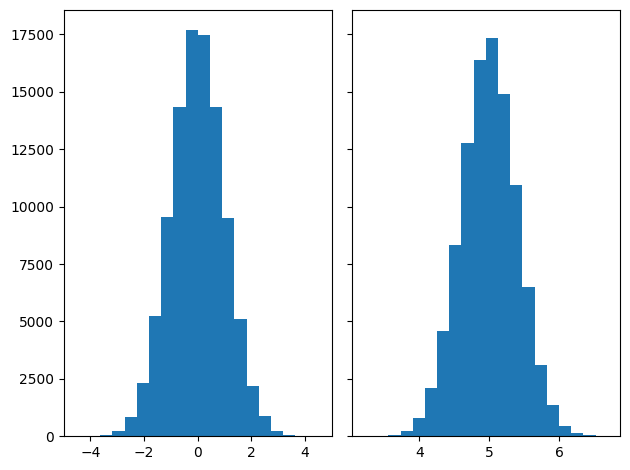

In [6]:
# Histograms

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

## Shading regions with a mask

Matplotlib enables us to shade regions of plots. This is useful for highlighting patterns in the data or regions where interesting patterns occur for our audience.

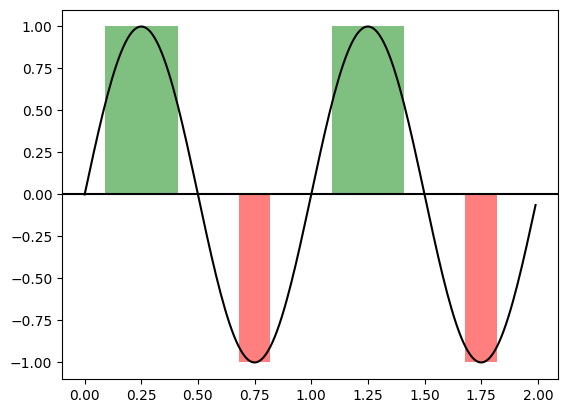

In [9]:
# Shade regions using a logical mask
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/span_regions.html#sphx-glr-gallery-lines-bars-and-markers-span-regions-py

t = np.arange(0.0, 2, 0.01)
s = np.sin(2*np.pi*t)

fig, ax = plt.subplots()

ax.plot(t, s, color='black')
ax.axhline(0, color='black')

ax.fill_between(t, 1, where=s > 0.5, facecolor='green', alpha=.5)
ax.fill_between(t, -1, where=s < -0.9, facecolor='red', alpha=.5)

plt.show()

## Fill Between

We can fill between two lines. This is useful for visualizing the area under a line.

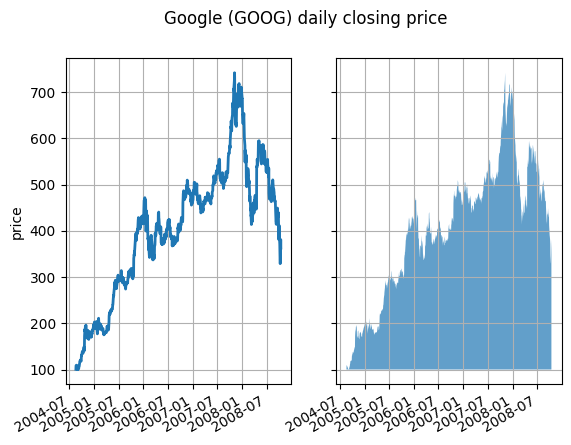

In [10]:
# Fill Between and Alpha
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-alpha-py

import matplotlib.cbook as cbook

# load up some sample financial data
r = cbook.get_sample_data('goog.npz')['price_data']
# create two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r["close"].min()

ax1.plot(r["date"], r["close"], lw=2)
ax2.fill_between(r["date"], pricemin, r["close"], alpha=0.7)

for ax in ax1, ax2:
    ax.grid(True)
    ax.label_outer()

ax1.set_ylabel('price')

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

## Legend

Matplotlib offers flexibility to make custom legends for our data.

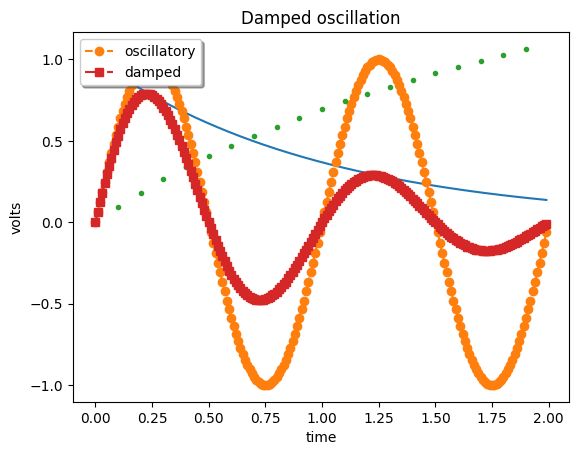

In [13]:
# Legend Demo
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend_demo.html#sphx-glr-gallery-text-labels-and-annotations-legend-demo-py

import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

fig, ax = plt.subplots()

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = ax.plot(t2, np.exp(-t2))
l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper left', shadow=True)
ax.set_xlabel('time')
ax.set_ylabel('volts')
ax.set_title('Damped oscillation')
plt.show()

## Stock Prices

Here we see a more involved example which combines several programming and plotting techniques learned so far.

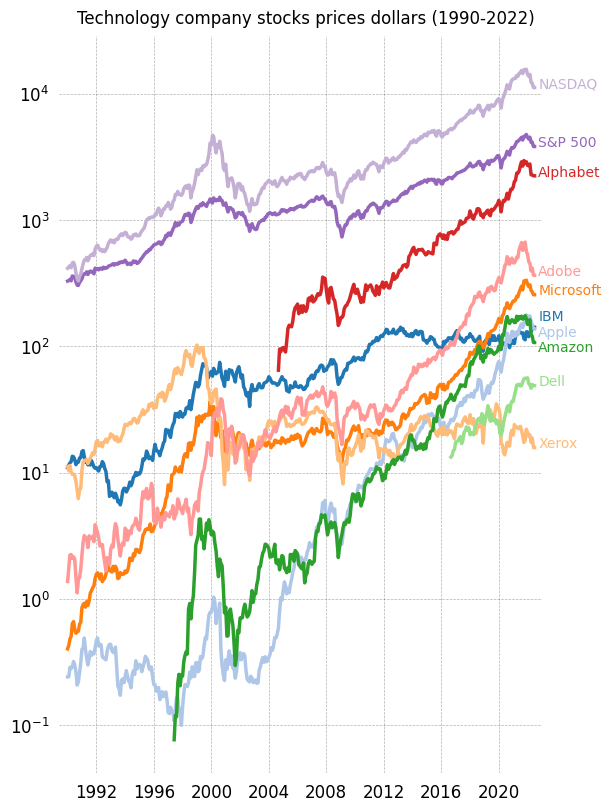

In [14]:
# Stock Prices
# https://matplotlib.org/stable/gallery/showcase/stock_prices.html#sphx-glr-gallery-showcase-stock-prices-py

from matplotlib.cbook import get_sample_data
import matplotlib.transforms as mtransforms

with get_sample_data('Stocks.csv') as file:
    stock_data = np.genfromtxt(
        file, delimiter=',', names=True, dtype=None,
        converters={0: lambda x: np.datetime64(x, 'D')}, skip_header=1)

fig, ax = plt.subplots(1, 1, figsize=(6, 8), layout='constrained')

# These are the colors that will be used in the plot
ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

stocks_name = ['IBM', 'Apple', 'Microsoft', 'Xerox', 'Amazon', 'Dell',
               'Alphabet', 'Adobe', 'S&P 500', 'NASDAQ']
stocks_ticker = ['IBM', 'AAPL', 'MSFT', 'XRX', 'AMZN', 'DELL', 'GOOGL',
                 'ADBE', 'GSPC', 'IXIC']

# Manually adjust the label positions vertically (units are points = 1/72 inch)
y_offsets = {k: 0 for k in stocks_ticker}
y_offsets['IBM'] = 5
y_offsets['AAPL'] = -5
y_offsets['AMZN'] = -6

for nn, column in enumerate(stocks_ticker):
    # Plot each line separately with its own color.
    # don't include any data with NaN.
    good = np.nonzero(np.isfinite(stock_data[column]))
    line, = ax.plot(stock_data['Date'][good], stock_data[column][good], lw=2.5)

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = stock_data[column][-1]

    # Use an offset transform, in points, for any text that needs to be nudged
    # up or down.
    offset = y_offsets[column] / 72
    trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
    trans = ax.transData + trans

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    ax.text(np.datetime64('2022-10-01'), y_pos, stocks_name[nn],
            color=line.get_color(), transform=trans)

ax.set_xlim(np.datetime64('1989-06-01'), np.datetime64('2023-01-01'))

fig.suptitle("Technology company stocks prices dollars (1990-2022)",
             ha="center")

# Remove the plot frame lines. They are unnecessary here.
ax.spines[:].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.set_yscale('log')

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
ax.grid(True, 'major', 'both', ls='--', lw=.5, c='k', alpha=.3)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted. Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
ax.tick_params(axis='both', which='both', labelsize='large',
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

# Finally, save the figure as a PNG.
# You can also save it as a PDF, JPEG, etc.
# Just change the file extension in this call.
# fig.savefig('stock-prices.png', bbox_inches='tight')
plt.show()

## Plot the Iris Dataset

Here we use Matplotlib directly to inspect the Iris dataset.

In [15]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Text(0.5, 0.98, 'Iris Features')

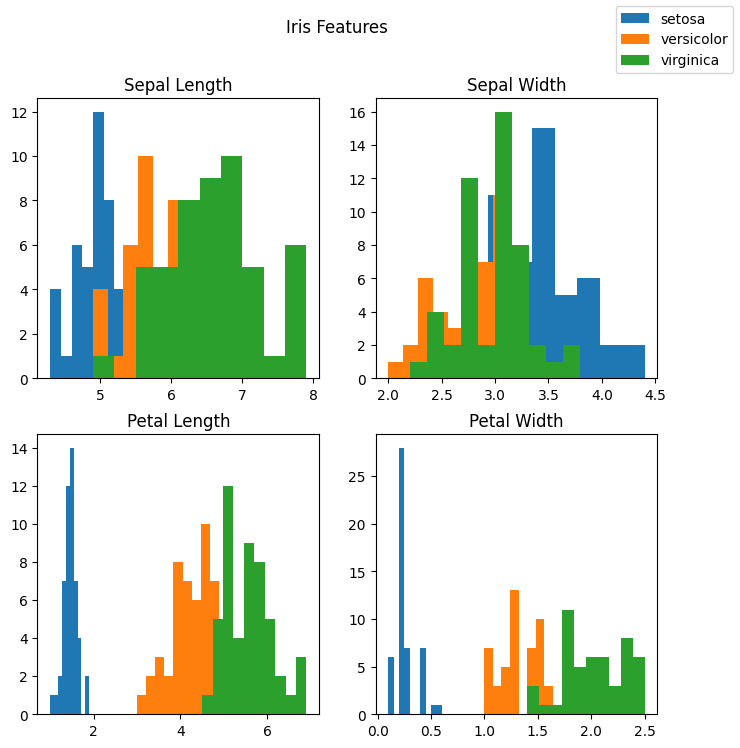

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
legend_list = []
for species_name in iris_df['species'].unique():
    species_mask = iris_df['species'] == species_name
    species_df = iris_df[species_mask]
    ax[0,0].hist(species_df['sepal_length'])
    ax[0,1].hist(species_df['sepal_width'])
    ax[1,0].hist(species_df['petal_length'])
    ax[1,1].hist(species_df['petal_width'])
    ax[0,0].set_title('Sepal Length')
    ax[0,1].set_title('Sepal Width')
    ax[1,0].set_title('Petal Length')
    ax[1,1].set_title('Petal Width')
    legend_list.append(species_name)

fig.legend(legend_list)
fig.suptitle('Iris Features')